In [1]:
### Importing required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data

df = pd.read_excel('php6pI1Nq.xlsx')

In [3]:
# Top 5 rows of the data

df.head()

,datetime,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dayOfWeek
0,'2011-01-01 00:00:00','00:00:00','1','0','0','1',9.84,14.395,81,0.0,16,'zaterdag'
1,'2011-01-01 01:00:00','01:00:00','1','0','0','1',9.02,13.635,80,0.0,40,'zaterdag'
2,'2011-01-01 02:00:00','02:00:00','1','0','0','1',9.02,13.635,80,0.0,32,'zaterdag'
3,'2011-01-01 03:00:00','03:00:00','1','0','0','1',9.84,14.395,75,0.0,13,'zaterdag'
4,'2011-01-01 04:00:00','04:00:00','1','0','0','1',9.84,14.395,75,0.0,1,'zaterdag'


In [4]:
# Dimension check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   time        10886 non-null  object 
 2   season      10886 non-null  object 
 3   holiday     10886 non-null  object 
 4   workingday  10886 non-null  object 
 5   weather     10886 non-null  object 
 6   temp        10886 non-null  float64
 7   atemp       10886 non-null  float64
 8   humidity    10886 non-null  int64  
 9   windspeed   10886 non-null  float64
 10  count       10886 non-null  int64  
 11  dayOfWeek   10886 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1020.7+ KB


In [5]:
# Removing time information from datetime column

df['datetime'] = df['datetime'].apply(lambda x : x.split(' ')[0])
df['datetime']

0        '2011-01-01
1        '2011-01-01
2        '2011-01-01
3        '2011-01-01
4        '2011-01-01
            ...     
10881    '2012-12-19
10882    '2012-12-19
10883    '2012-12-19
10884    '2012-12-19
10885    '2012-12-19
Name: datetime, Length: 10886, dtype: object

In [6]:
# Check type of 'datetime' column

type(df['datetime'])

pandas.core.series.Series

In [7]:
# Converting 'datetime' column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.head(2)

,datetime,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dayOfWeek
0,2011-01-01,'00:00:00','1','0','0','1',9.84,14.395,81,0.0,16,'zaterdag'
1,2011-01-01,'01:00:00','1','0','0','1',9.02,13.635,80,0.0,40,'zaterdag'


In [9]:
type(df['datetime'])

pandas.core.series.Series

In [10]:
df2 = df[['datetime','time','count']]
df2.head()

,datetime,time,count
0,2011-01-01,'00:00:00',16
1,2011-01-01,'01:00:00',40
2,2011-01-01,'02:00:00',32
3,2011-01-01,'03:00:00',13
4,2011-01-01,'04:00:00',1


In [11]:
# "Dataset consists of observations recorded every hour. For easy model building , we groupby the data to every day by
# considering average rides per day"


df2 = df2.groupby(by = 'datetime' , axis=0).mean()

In [12]:
df2

,count
datetime,
2011-01-01,41.041667
2011-01-02,34.826087
2011-01-03,61.318182
2011-01-04,67.913043
2011-01-05,69.565217
...,...
2012-12-15,210.291667
2012-12-16,157.750000
2012-12-17,191.041667


In [13]:
# Resetting column name 
df2.columns = ['# of rides']

In [14]:
df2.head(2)

,# of rides
datetime,
2011-01-01,41.041667
2011-01-02,34.826087


# Trend analysis of number of rides every month

Text(0.5, 1.0, 'Trend analysis of number of rides for 456 days')

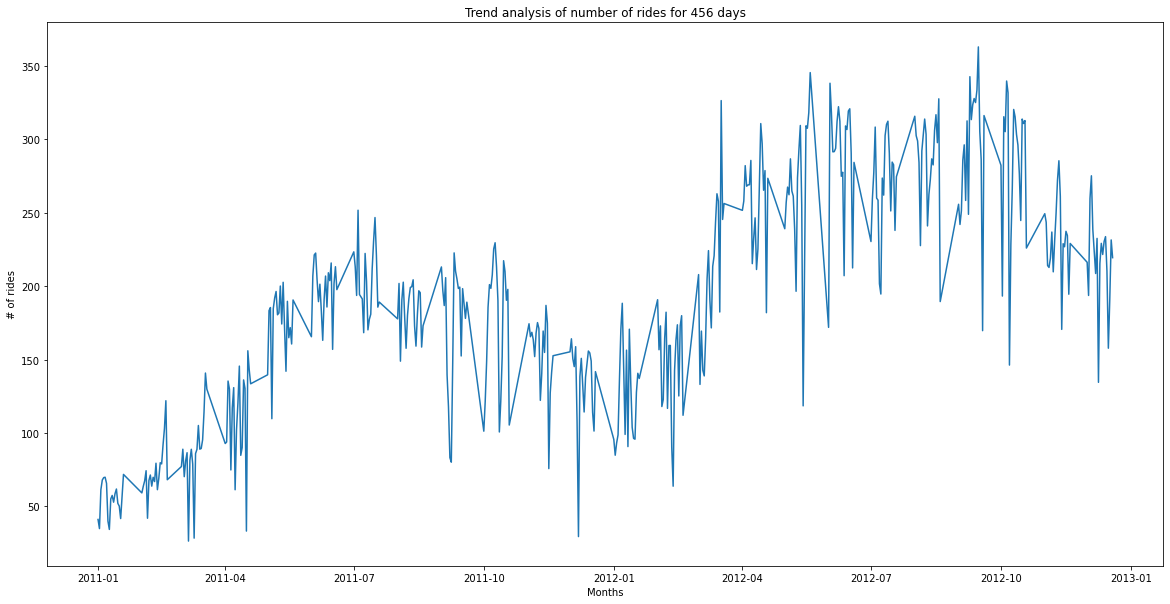

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df2['# of rides'])
plt.xlabel('Months')
plt.ylabel('# of rides')
plt.title('Trend analysis of number of rides for 456 days')

# ACF and PACF

In [16]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

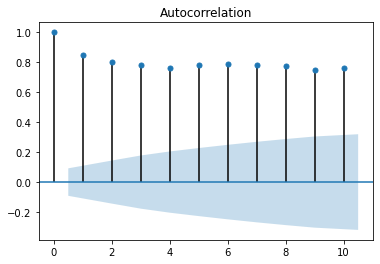

In [20]:
# Showing auto correlation upto 20 lags

acf_lot = plot_acf(df2['# of rides'] , lags=10)

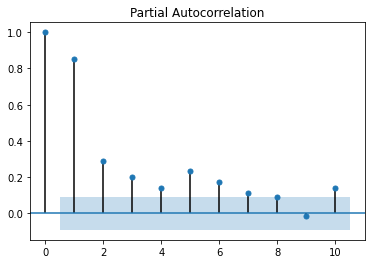

In [21]:
pacf_lot = plot_pacf(df2['# of rides'] , lags=10)

In [ ]:
--> Here H0 is 'auto correlation value = 0'.
--> Shaded area represents upper and lower bounds for critical values , where H0 cannot be rejected. 

# ARMA

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
# Using 426 days data to buid model and forecasting number of rides next 30 days
arima = ARIMA(df2['# of rides'][0:426].astype(np.float64).to_numpy() , order = (1,0,1))

In [25]:
arima_model = arima.fit()

In [26]:
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 4291.0632
Dependent Variable: y                Log-Likelihood:      -2133.4  
Date:               2020-11-08 19:32 Scale:               1.0000   
No. Observations:   426              Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       423                                   6        
Converged:          1.0000           S.D. of innovations: 36.094   
No. Iterations:     26.0000          HQIC:                4281.252 
AIC:                4274.8454                                      
--------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
const        167.2396   56.3179    2.9696  0.0030  56.8586  277.6206
ar.L1.y        0.9945    0.0051  196.3937  0.0000   0.9846    1.0044
ma.L1.y       -0.7651    0.0410  -18.6387  0.0000  -0.8455   -0.6846
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.0055             0.0000           1.0055             0.0000
MA.1           1.3071             0.0000           1.3071             0.0000
===================================================================

"""

In [27]:
def mape(actual,pred):
    y_true , p_pred = np.array(actual) , np.array(pred)
    print(f"MAPE for moving average = {np.round(np.mean(np.abs((actual-pred) / actual)) * 100 , 2)}") 

In [28]:
pred = arima_model.predict(426,456)

In [30]:
pred

array([229.78915413, 229.44616289, 229.10505245, 228.76581249,
       228.42843275, 228.09290305, 227.75921322, 227.42735319,
       227.09731291, 226.76908242, 226.44265178, 226.11801113,
       225.79515065, 225.47406058, 225.15473121, 224.83715289,
       224.52131602, 224.20721104, 223.89482845, 223.58415883,
       223.27519276, 222.96792091, 222.662334  , 222.35842277,
       222.05617804, 221.75559068, 221.45665159, 221.15935174,
       220.86368214, 220.56963384, 220.27719796])

In [33]:
mape(df2['# of rides'][425:] , pred)

MAPE for moving average = 10.78
